In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

In [2]:
df     = pd.read_csv("data/lyrical_genius.csv")
df = df[((df["Genre"] == "pop") | (df["Genre"] ==  "country"))]
df = df.drop(columns="Unnamed: 0")
df = df.drop_duplicates(subset=["Name","Artist"],keep=False)

In [3]:
x_cols    = ["Is_Exp","Danceability","Energy","Key","Loudness","Mode","Speechiness","Acousticness","Instrumentalness","Liveness","Valence","Tempo","Time_Signature"]
y_cols    = ["Genre"]
meta_cols = ["Id","Popularity","Name","Artist"]

In [4]:
X,y,meta = df[x_cols],df[y_cols].iloc[:,0],df[meta_cols]

In [5]:
scaler   = StandardScaler()
scaled_X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(scaled_X,y, test_size=.2, random_state=1234, stratify=y)

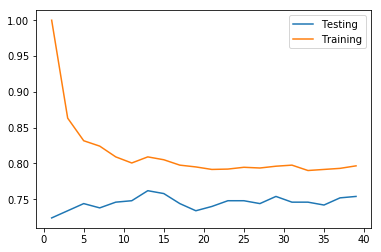

[[102  78]
 [ 45 275]]
              precision    recall  f1-score   support

     country       0.69      0.57      0.62       180
         pop       0.78      0.86      0.82       320

   micro avg       0.75      0.75      0.75       500
   macro avg       0.74      0.71      0.72       500
weighted avg       0.75      0.75      0.75       500

0.754


In [6]:
ns = []
test_scores = []
train_scores = []
for n in range(1,40,2):
    classifier = KNeighborsClassifier(n_neighbors=n)  
    classifier.fit(X_train, y_train)  
    y_pred = classifier.predict(X_test)  
    training = classifier.score(X_train, y_train)
    testing  = classifier.score(X_test,  y_test)
    
    ns.append(n)
    test_scores.append(testing)
    train_scores.append(training)
plt.plot(ns,test_scores,label="Testing")
plt.plot(ns, train_scores,label="Training")
plt.legend()
plt.show()

from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

In [12]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=5)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print("average", np.mean(cv_scores))

[0.7675     0.7525     0.7375     0.7518797  0.74874372]
average 0.7516246835682171


In [22]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1,25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [26]:
knn2.score(X_test,y_test)

0.744